## Programming Assignment
#### Submitted by Maria Eloisa H. Garcia

---
#### Instructions:
1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump, load


In [250]:
df = pd.read_csv('household_power_consumption.txt', sep=';', header=0, na_values='?', dtype={
    'Global_active_power': float,
    'Global_reactive_power': float,
    'Voltage': float,
    'Global_intensity': float,
    'Sub_metering_1': float,
    'Sub_metering_2': float,
    'Sub_metering_3': float
}, low_memory=False)

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'])
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'])
df['Voltage'] = pd.to_numeric(df['Voltage'])
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'])
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'])
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'])
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'])

df.dropna(inplace=True)
df = df.sample(n=100000, random_state=42) 
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1030580,1/12/2008,09:44:00,1.502,0.074,240.17,6.4,0.0,0.0,18.0
1815,17/12/2006,23:39:00,0.374,0.264,245.50,1.8,0.0,2.0,0.0
1295977,3/6/2009,17:01:00,0.620,0.300,239.85,3.0,0.0,1.0,1.0
206669,9/5/2007,05:53:00,0.280,0.200,235.72,1.4,0.0,0.0,0.0
1048893,14/12/2008,02:57:00,1.372,0.054,243.95,5.6,0.0,0.0,18.0


##### Multiple Features (N-Dimensional)
What is the relationship between each energy sub-metering and global intensity?

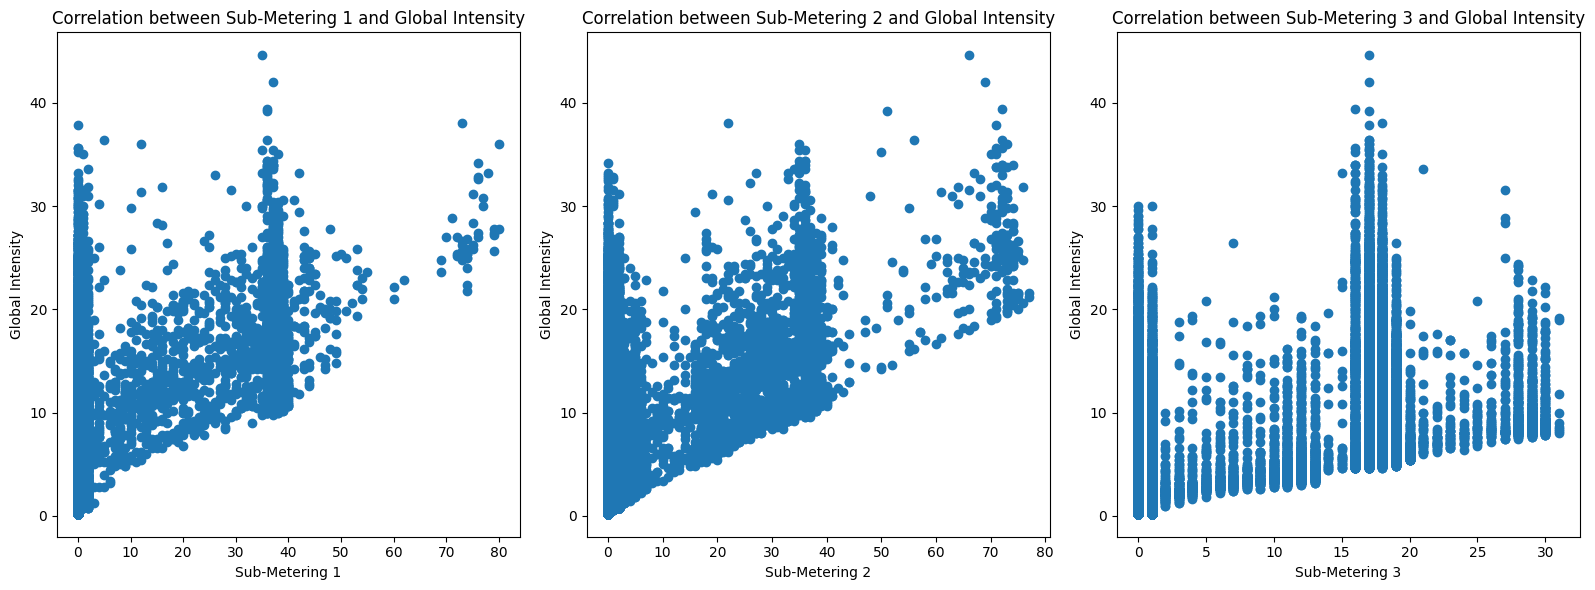

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['Sub_metering_1'], df['Global_intensity'], 'o')
axes[0].set_ylabel("Global Intensity")
axes[0].set_xlabel("Sub-Metering 1")
axes[0].set_title("Correlation between Sub-Metering 1 and Global Intensity")

axes[1].plot(df['Sub_metering_2'], df['Global_intensity'], 'o')
axes[1].set_ylabel("Global Intensity")
axes[1].set_xlabel("Sub-Metering 2")
axes[1].set_title("Correlation between Sub-Metering 2 and Global Intensity")

axes[2].plot(df['Sub_metering_3'], df['Global_intensity'], 'o')
axes[2].set_ylabel("Global Intensity")
axes[2].set_xlabel("Sub-Metering 3")
axes[2].set_title("Correlation between Sub-Metering 3 and Global Intensity")

plt.tight_layout()
plt.show()

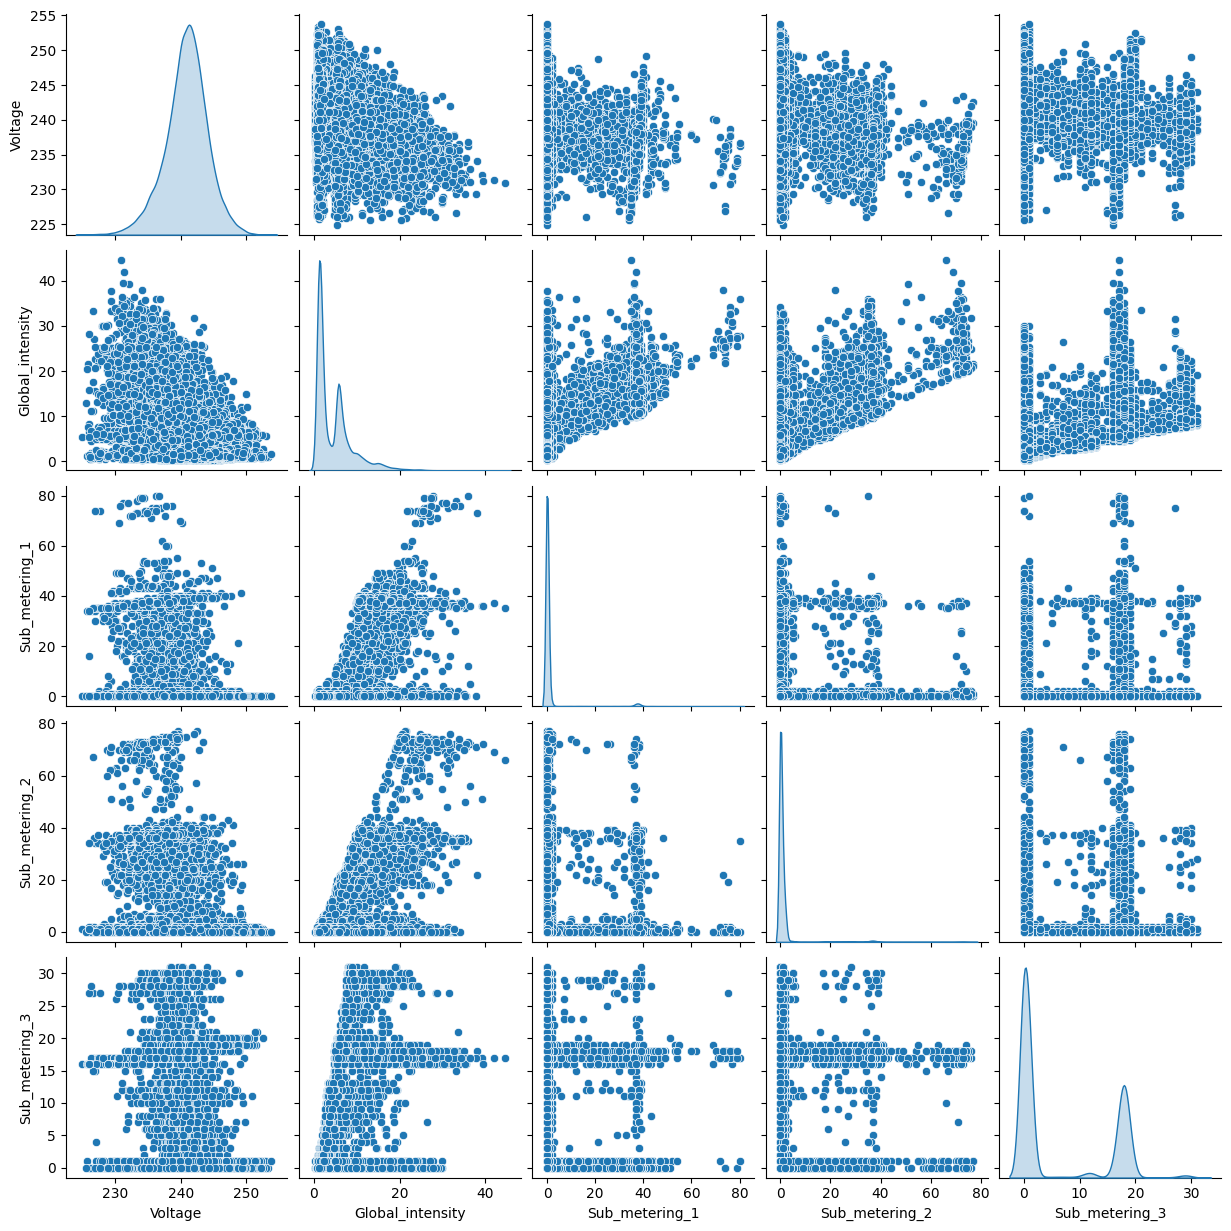

In [252]:
sns.pairplot(df.drop(["Date", "Time", "Global_active_power", "Global_reactive_power"], axis=1),diag_kind='kde')

In [253]:
X = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_intensity']

#### Train | Test Split

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [255]:
X_train

,Sub_metering_1,Sub_metering_2,Sub_metering_3
1938833,0.0,0.0,0.0
1000512,0.0,0.0,18.0
629402,0.0,0.0,0.0
1297451,0.0,0.0,1.0
1028639,0.0,0.0,19.0
...,...,...,...
1163964,0.0,0.0,0.0
635216,0.0,1.0,0.0
454756,0.0,0.0,18.0
1022431,0.0,0.0,0.0


In [256]:
y_train

1938833     1.2
1000512    13.8
629402      0.8
1297451     1.4
1028639     5.4
           ... 
1163964     2.0
635216      7.0
454756      5.2
1022431     7.2
1363884     1.6
Name: Global_intensity, Length: 80000, dtype: float64

In [257]:
X_test

,Sub_metering_1,Sub_metering_2,Sub_metering_3
1313565,0.0,0.0,18.0
208050,0.0,1.0,0.0
331364,0.0,0.0,0.0
261218,0.0,0.0,0.0
2018827,0.0,1.0,1.0
...,...,...,...
1604428,38.0,2.0,0.0
542988,0.0,0.0,17.0
991802,0.0,0.0,0.0
1695069,0.0,0.0,18.0


In [258]:
y_test

1313565     6.2
208050      1.4
331364      1.2
261218      0.6
2018827     2.4
           ... 
1604428    14.6
542988      9.6
991802      1.2
1695069     9.2
517711      0.8
Name: Global_intensity, Length: 20000, dtype: float64

#### Creating a Model and Fit/Train on the Training Data

In [259]:
model = LinearRegression()

In [260]:
X_train

,Sub_metering_1,Sub_metering_2,Sub_metering_3
1938833,0.0,0.0,0.0
1000512,0.0,0.0,18.0
629402,0.0,0.0,0.0
1297451,0.0,0.0,1.0
1028639,0.0,0.0,19.0
...,...,...,...
1163964,0.0,0.0,0.0
635216,0.0,1.0,0.0
454756,0.0,0.0,18.0
1022431,0.0,0.0,0.0


In [261]:
model.fit(X_train, y_train)

LinearRegression()

#### Calculate Performance on Test Set

In [262]:
test_predictions = model.predict(X_test)
test_predictions

array([7.29453981, 2.32291954, 2.03692133, ..., 2.03692133, 7.29453981,
       2.03692133])

In [263]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.5783950231053823

In [264]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

5.34157807772706

In [265]:
RMSE = np.sqrt(MSE)
RMSE

2.3111854269458907

In [266]:
df['Global_intensity'].mean()

4.636164

#### Plotting Residuals

In [267]:
test_predictions = model.predict(X_test)
test_res = y_test - test_predictions

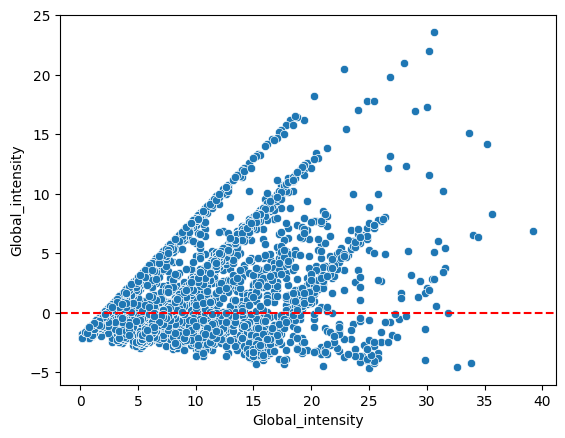

In [268]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [269]:
len(test_res)

20000

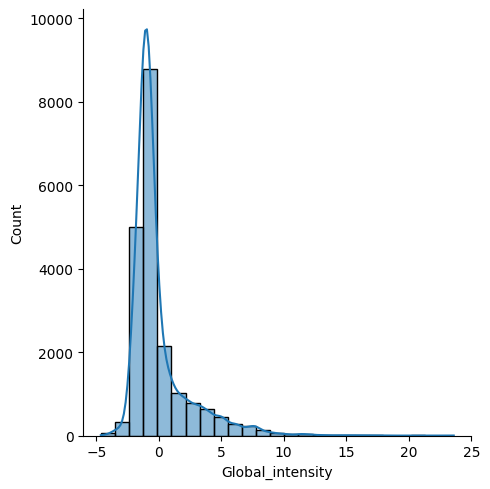

In [270]:
sns.displot(test_res,bins=25,kde=True)

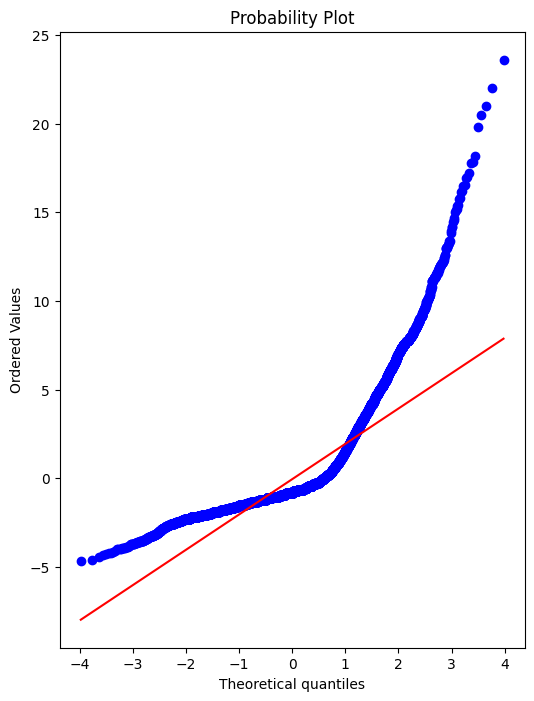

In [271]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

#### Retraining Model on Full Data

In [272]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

#### Deployment, Predictions, and Model Attributes
##### Final Model Fit

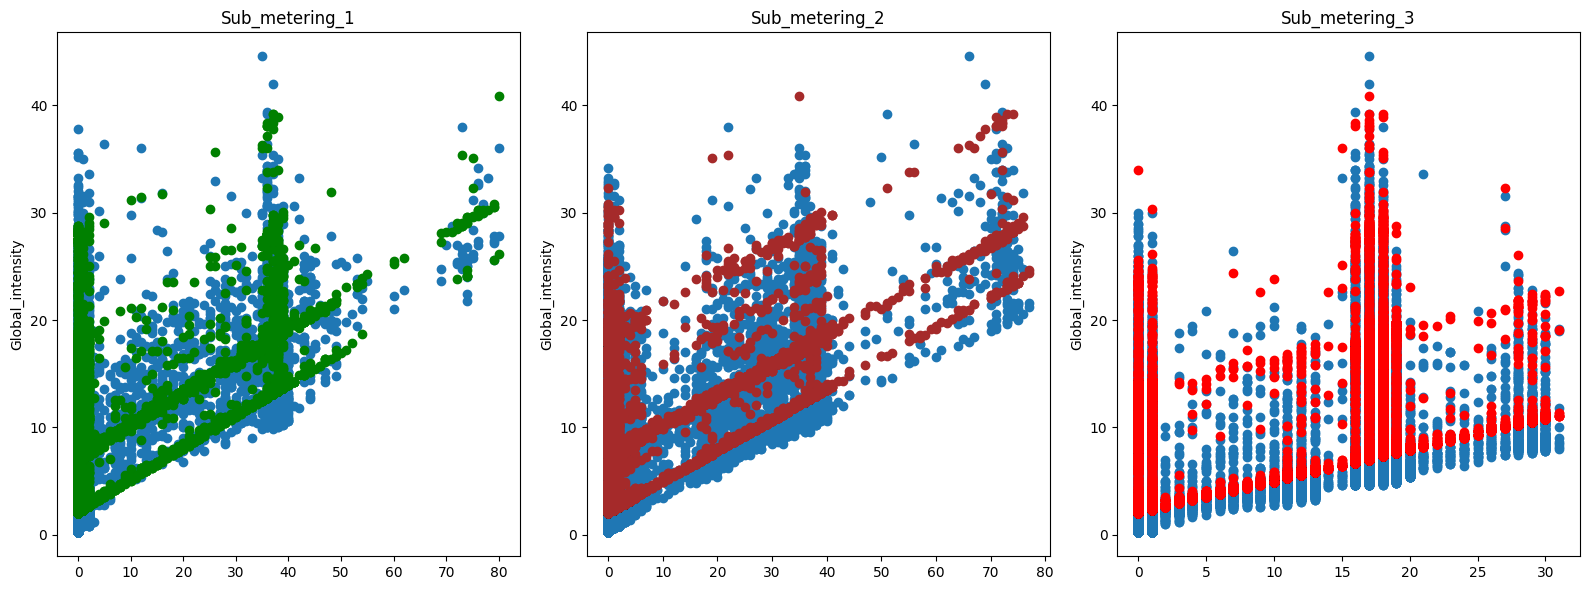

In [273]:
y_hat = final_model.predict(X)


fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['Sub_metering_1'],df['Global_intensity'],'o')
axes[0].plot(df['Sub_metering_1'],y_hat,'o',color='green')
axes[0].set_ylabel("Global_intensity")
axes[0].set_title("Sub_metering_1")

axes[1].plot(df['Sub_metering_2'],df['Global_intensity'],'o')
axes[1].plot(df['Sub_metering_2'],y_hat,'o',color='brown')
axes[1].set_title("Sub_metering_2")
axes[1].set_ylabel("Global_intensity")

axes[2].plot(df['Sub_metering_3'],df['Global_intensity'],'o')
axes[2].plot(df['Sub_metering_3'],y_hat,'o',color='red')
axes[2].set_title("Sub_metering_3");
axes[2].set_ylabel("Global_intensity")
plt.tight_layout();

##### Residuals

In [274]:
residuals = y_hat - y

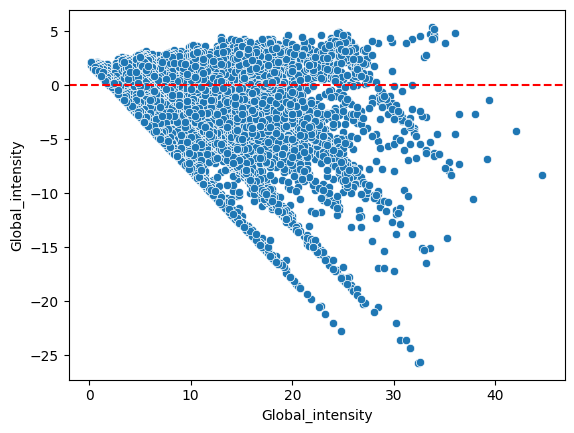

In [275]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

##### Coefficients

In [276]:
final_model.coef_

array([0.29828256, 0.28616838, 0.29210368])

In [277]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Sub_metering_1,0.298283
Sub_metering_2,0.286168
Sub_metering_3,0.292104


**OBSERVATIONS**
- **Sub-Metering 1:** This value of the coefficient represents that, on an average, for every one-unit rise in the Sub_metering_1 factor (such as energy usage in the kitchen), the global intensity (the household's global minute-averaged current intensity) increases by roughly 0.298283 units, while keeping all other variables steady. In simpler words, this implies that higher energy usage in the kitchen is linked with a rise in the overall current intensity of the household, given that other factors do not change.
- **Sub-Metering 2:** It should be noted that with each increment of one unit in the Sub_metering_2 factor, i.e., the energy consumption in the laundry room, the global intensity goes up by roughly 0.286168 units, while keeping all other variables constant. This indicates that there is a correlation between higher energy consumption in the laundry room and an increase in the overall current intensity of the household, assuming that all other factors remain the same.
- **Sub-Metering 3:** It has been observed that with every one-point increase in the Sub_metering_3 variable, there is a corresponding increase of about 0.292104 units in the global intensity, assuming all other variables remain the same. This implies that higher consumption of energy by the electric water heater and air-conditioner leads to an increase in the overall household current intensity, provided that there are no changes in other factors.

In [278]:
df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','Global_intensity']].corr()

,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity
Sub_metering_1,1.000000,0.058167,0.103929,0.495953
Sub_metering_2,0.058167,1.000000,0.080160,0.441080
Sub_metering_3,0.103929,0.080160,1.000000,0.627342
Global_intensity,0.495953,0.441080,0.627342,1.000000


#### Prediction on New Data

In [279]:
new_record = [[1.1,4.1,15]]

final_model.predict(new_record)

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.90947765])

#### Saving and Loading the Model

In [280]:
dump(final_model, 'household_power_model.joblib') 

['household_power_model.joblib']

In [281]:
loaded_model = load('household_power_model.joblib')

In [282]:
loaded_model.predict(new_record)

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.90947765])